# Table of Contents:

1.   Dataset Description
2.   Import Libraries
3.   Getting Data
4.   Analysis
5.   Data Preprocess
6.   Model Building
7.   Evaluating Models
8.   Submission
9.   Summary

# Data Description


**VARIABLE DESCRIPTIONS**

1.   Pclass-----Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
2.   Survival---Survival (0 = No; 1 = Yes)
3.   Name-------Name
4.   Sex--------Sex
5.   Age--------Age
6.   Sibsp------Number of Siblings/Spouses Aboard
7.   Parch------Number of Parents/Children Aboard
8.   Ticket-----Ticket Number
9.   Fare------Passenger Fare (British pound)
10.  Cabin-------Cabin
11.  Embarked-------Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

# Import Libraries

In [ ]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns 

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Getting Data

In [ ]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

# Data Analysis

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
total = data_train.isnull().sum().sort_values(ascending = False)
percent_1 = data_train.isnull().sum()/data_train.isnull().count()*100
final_percent = (round(percent_1,2)).sort_values(ascending = False)
missing_table = pd.concat([total,final_percent],axis=1,keys =['Total Missing Values','Percent of Missing Values'])
missing_table

,Total Missing Values,Percent of Missing Values
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


Cabin is having the maximum null values or missing values. with 77% of its data missing.

In [ ]:
data_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
total = data_train['Survived'].count()
survived = len(data_train[data_train['Survived']==1])
not_survived = len(data_train[data_train['Survived']==0])
per_survived = survived/total
print("The Percent of Survived Population",per_survived*100)
per_no_survived = not_survived/total
print("The Percent of Population not Survived",per_no_survived*100)

The Percent of Survived Population 38.38383838383838
The Percent of Population not Survived 61.61616161616161


**Above we can see that 38% out of the training-set survived the Titanic.**

In [ ]:
data_train.groupby('Embarked').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


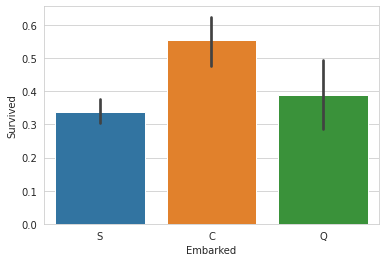

In [ ]:
sns.barplot('Embarked','Survived',data=data_train)

In [ ]:
data_train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


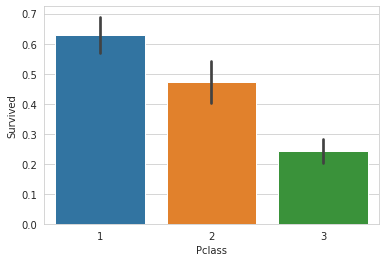

In [ ]:
sns.barplot('Pclass','Survived',data=data_train)

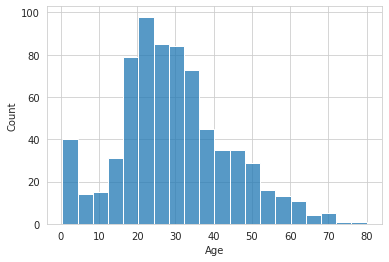

In [ ]:
sns.histplot(data=data_train,x='Age')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

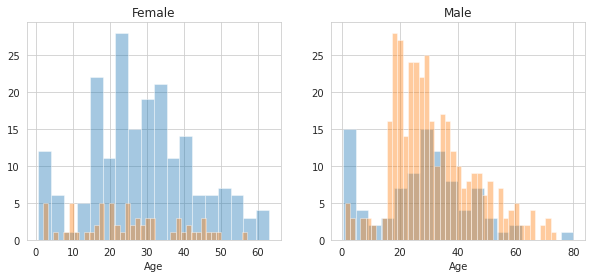

In [ ]:
survived = 'survived' 
not_survived = 'not servived'
women = data_train[data_train['Sex']=='female']
men = data_train[data_train['Sex']=='male']
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
_ = ax.set_title('Male')

Men have a high probability of survival when they are between 18 and 30 years old For women the survival chances are higher between 14 and 40.

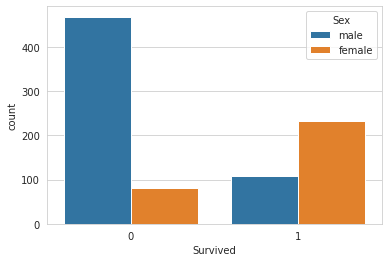

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data_train)

2. Pclass and Embarked

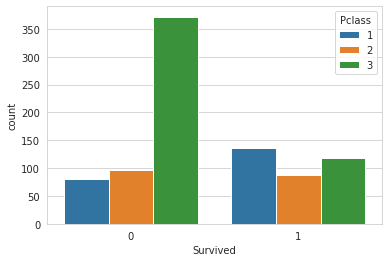

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data_train)

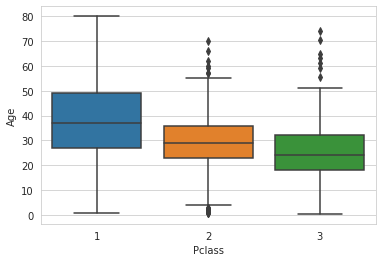

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=data_train)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x7fa7e9ff3630>>

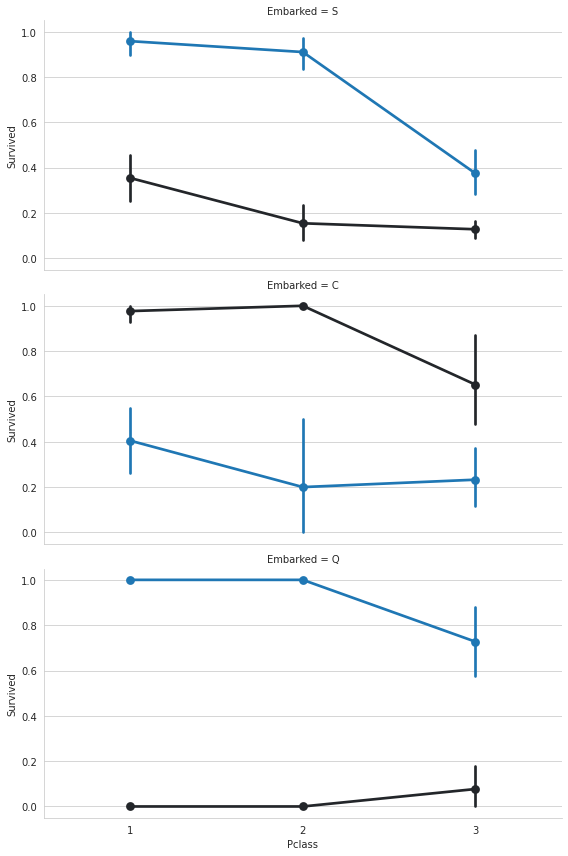

In [ ]:
FacetGrid = sns.FacetGrid(data_train,row='Embarked',size=4,aspect=2)
FacetGrid.map(sns.pointplot,'Pclass','Survived','Sex')
FacetGrid.add_legend

Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


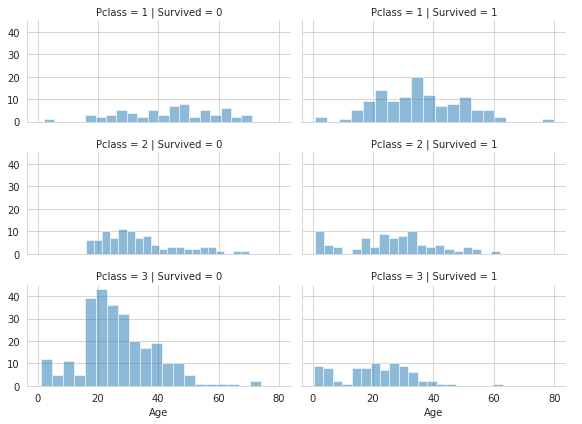

In [ ]:
grid = sns.FacetGrid(data_train, col='Survived', row='Pclass', size=2, aspect=2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# Data Preprocess

First we will neglect the missing valued columns.

1. Cabin

In [ ]:
data_train = data_train.drop(['Cabin'], axis=1)
data_test = data_test.drop(['Cabin'], axis=1)

2. Age

In [ ]:
data = [data_train,data_test]

for dataset in data:
  mean = data_train["Age"].mean()
  std = data_test["Age"].std()
  is_null = dataset["Age"].isnull().sum()

  rand_age = np.random.randint(mean - std, mean + std, size = is_null)

  age_copy = dataset["Age"].copy()
  age_copy[np.isnan(age_copy)] = rand_age
  dataset["Age"] = age_copy
  dataset["Age"] = data_train["Age"].astype(int)

In [ ]:
data_train['Age'].isnull().sum()
data_test['Age'].isnull().sum()

0

3. Embarked

In [ ]:
data_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
common_value = 'S'
dataset = [data_train,data_test]

for data in dataset:
    data['Embarked'] = data['Embarked'].fillna(common_value)

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    object
 3   Sex          418 non-null    object
 4   Age          418 non-null    int64 
 5   SibSp        418 non-null    int64 
 6   Parch        418 non-null    int64 
 7   Ticket       418 non-null    object
 8   Fare         418 non-null    int64 
 9   Embarked     418 non-null    object
dtypes: int64(6), object(4)
memory usage: 32.8+ KB


Secondly we will convert the object and float types into int datatype.

Fare

In [ ]:
data = [data_train,data_test]

for dataset in data:
  dataset['Fare'] = dataset['Fare'].fillna(0)
  dataset['Fare'] = dataset['Fare'].astype(int)

Name

In [ ]:
data_train['Name'].unique()

In [ ]:
data_train = data_train.drop(['Name'],axis=1)
data_test = data_test.drop(['Name'],axis=1)

Sex

In [ ]:
data_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
gender ={'male':0,"female":1}
data = [data_train, data_test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(gender)

Ticket

In [ ]:
data_train['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [ ]:
data_train = data_train.drop(['Ticket'],axis=1)
data_test = data_test.drop(['Ticket'],axis = 1)

Embarked

In [ ]:
data_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
port = {"S":0,"C":1,"Q":2}
dataset = [data_train,data_test]

for data in dataset:
  data['Embarked'] = data['Embarked'].map(port)

In [ ]:
data_train.info()

In [ ]:
data_test.info()

Creating Categories from unique values of age and fare

In [ ]:
data = [data_train,data_test]

for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [ ]:
data_train['Age'].value_counts()

4    167
6    166
5    147
3    138
2    114
1     91
0     68
Name: Age, dtype: int64

In [ ]:
data_test['Age'].value_counts()

4    80
6    71
5    66
3    66
2    62
1    40
0    33
Name: Age, dtype: int64

In [ ]:
data = [data_train,data_test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 14), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,2,1,0,0,0
1,2,1,1,1,5,1,0,3,1
2,3,1,3,1,3,0,0,0,0
3,4,1,1,1,5,1,0,3,0
4,5,0,3,0,5,0,0,1,0


Lets Combine SibSp and Parch

In [ ]:
data = [data_train, data_test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

In [ ]:
data_train = data_train.drop(['SibSp'],axis =1)
data_test = data_test.drop(['SibSp'],axis =1)

In [ ]:
data_train = data_train.drop(['Parch'],axis=1)
data_test = data_test.drop(['Parch'],axis=1)

# Model Building 

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Sex          891 non-null    int64
 4   Age          891 non-null    int64
 5   Fare         891 non-null    int64
 6   Embarked     891 non-null    int64
 7   relatives    891 non-null    int64
 8   not_alone    891 non-null    int64
dtypes: int64(9)
memory usage: 62.8 KB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   Age          418 non-null    int64
 4   Fare         418 non-null    int64
 5   Embarked     418 non-null    int64
 6   relatives    418 non-null    int64
 7   not_alone    418 non-null    int64
dtypes: int64(8)
memory usage: 26.2 KB


In [ ]:
data_train = data_train.drop(['PassengerId'],axis=1)
data_test = data_test.drop(['PassengerId'],axis=1)

In [ ]:
X_train = data_train.drop("Survived", axis=1)
Y_train = data_train["Survived"]
X_test  = data_test

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

90.01 %


In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2,), "%")

80.13 %


In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn,2,), "%")

85.97 %


In [ ]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

77.78 %


In [ ]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

80.47 %


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

90.01 %


# Evaluating Models

In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
90.01,Random Forest
90.01,Decision Tree
85.97,KNN
80.47,Support Vector Machines
80.13,Logistic Regression
77.78,Naive Bayes


In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=5, scoring = "accuracy")

In [ ]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


Scores: [0.77094972 0.79775281 0.86516854 0.79213483 0.83146067]
Mean: 0.811493314920595
Standard Deviation: 0.033127211080008975


In [ ]:
import_feature = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
import_feature = import_feature.sort_values('importance',ascending=False).set_index('feature')
import_feature

,importance
feature,
Sex,0.350
Age,0.199
Fare,0.135
Pclass,0.124
relatives,0.107
Embarked,0.063
not_alone,0.021


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[475,  74],
       [104, 238]])

In [ ]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.7628205128205128
Recall: 0.695906432748538


In [ ]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.72782874617737

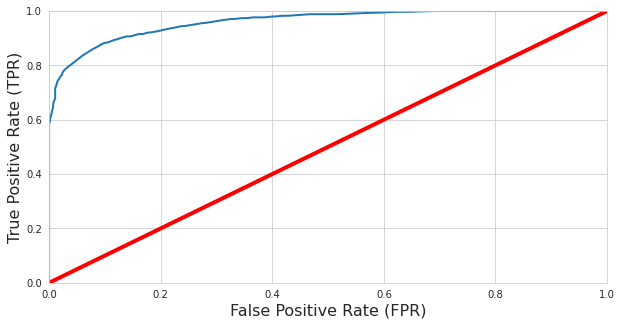

In [ ]:
from sklearn.metrics import roc_curve

y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9603585466398236


# Submission

In [ ]:
data_test = pd.read_csv('test.csv')
submission = pd.DataFrame({
        "PassengerId": data_test["PassengerId"],
        "Survived": Y_prediction
    })
submission.to_csv('submission.csv', index=False)

Starting data exploration, checked about missing data and learned which features are important. Also visualized the data using seaborn and matplotlib. During the data preprocessing converted object and float features into numeric ones. Later I trained different machine learning models, picked the algorithm with high accuracy random forest and applied cross validation on it. Computed it's confusion matrix and computed the models precision, recall and f-score.